
# Kapitel 3: Komplexe Widerstände


Version: 23. Mai 2025

Autoren: Markus Lippitz, Thorsten Schumacher


Dieses Kapitel überlappt mit der parallel laufenden Vorlesung der Experimentalphysik zur Elektrizitätslehre. Wir behandeln Wechselstrom-Schaltkreise und komplexe Widerstände, weil das im nächsten Versuch benötigt wird. Gleichzeitig ist dies ein Beispiel, wie man Simulationen in Python schreiben kann. Wir simulieren also das Experiment, bevor Sie es durchführen werden.


## Notation

Ich verwendet große Symbole $U$, $I$ für Spannung und Strom, und ergänze Indizes, wenn dies Spannungen und Ströme durch bestimmte Bauteile oder Teil-Schaltkreise beschreiben soll (manche Quellen nehmen dafür kleine $u$, $i$). Ich verwendet $i = \sqrt{-1}$. Manche Quellen verwenden dafür ein $j$, um es vom $i$ für Teil-Ströme zu unterscheiden. Achtung: Manchmal wird auch $j = - \sqrt{-1}$ gesetzt, tendenziell in ingenieurwissenschaftlichen Texten.

## Allgemeine Einführung (basierend auf wikipedia.de)

Die Bestimmung des Verhältnisses von Stromstärke zu Spannung in einem
elektrischen Stromkreis ist eine
der Grundaufgaben der Elektrotechnik.

Wird eine zeitlich konstante Spannung $U$ vorgegeben und die Stromstärke
$I$ bestimmt, oder wird die Stromstärke $I$ vorgegeben und die Spannung
$U$ bestimmt, so wird das Verhältnis $U/I$ als elektrischer
Widerstand $R$ oder das Verhältnis $I / U$ als elektrischer
Leitwert $G$
bezeichnet.

Als passive lineare  Elemente des Wechselstromkreises treten ohmsche Widerstände,
Induktivitäten oder Kapazitäten auf. Für diese Elemente gilt:

* Ohmscher  Widerstand $R$:  die Stromstärke ist der Spannung proportional:
  $$I = \frac U R$$


* Induktivität  $L$: die  Stromstärke*änderung* ist der Spannung proportional:
  $$\frac{\mathrm dI}{\mathrm dt} = \frac UL$$  
   oder gleichwertig  
  $$I \cdot L = \int  U \cdot \mathrm dt $$

* Kapazität $C$: die
  Spannungs*änderung* ist der Stromstärke proportional:
  $$ \frac{\mathrm dU}{\mathrm dt} = \frac IC$$
     oder gleichwertig  
  $$U \cdot C = \int I \cdot \mathrm dt $$

Ist eine der vorgegebenen Größen -- Spannung oder Stromstärke
(umgangssprachlich einfach Strom) -- konstant, so ist die resultierende
Größe nur bei rein ohmschen 
Stromkreisen ebenfalls konstant. Die angewendeten Verfahren der
Berechnung sind dann, und nur dann, die der Gleichstromrechnung. Eine
ideale Induktivität würde hier einen Kurzschluss, eine ideale Kapazität
eine Unterbrechung des Stromzweiges darstellen.  


Ist die vorgegebene Größe nicht konstant, oder ist der Stromkreis nicht
rein ohmsch, so ist die Strom/Spannungs-Beziehung komplizierter.
Kapazitäten und Induktivitäten müssen dann über
*Differentialgleichungen* 
in die Berechnung einfließen. Jedoch kann die Berechnung in Sonderfällen
einfacher werden.

So ein Sonderfall liegt vor, wenn die vorgegebene Größe einen
cosinusförmigen periodischen Verlauf hat, z. B. ein cosinusförmiger Strom
$$I = \hat I \cdot \cos (\omega t + \varphi_I)$$ 
oder eine cosinusförmige Spannung
$$U = \hat U \cdot \cos (\omega t + \varphi_U)$$

Dabei ist $\hat U$ und auch $\hat I$ der Maximalwert, auch
*Amplitude* genannt, $\omega = 2\pi f$
ist die *Kreisfrequenz*,
$\varphi_U$ und auch $\varphi_I$ ist der
Nullphasenwinkel der
Wechselgröße. Die Differenz $\varphi_U - \varphi_I$ wird
*Phasenverschiebungswinkel*
genannt.

Dann hat die sich einstellende Größe einen ebenfalls cosinusförmigen
periodischen Verlauf gleicher
Frequenz, der sich allerdings in der
Phasenverschiebung und dem Amplitudenverhältnis mit der Frequenz
verändern kann.

Die mathematische Behandlung diesbezüglicher Rechnungen erfolgt
vorteilhaft unter Verwendung komplexer
Größen da diese die
Lösung trigonometrischer Aufgaben wesentlich erleichtern.




## Komplexe Spannung und komplexer Strom (basierend auf wikipedia)

![Zeigerdiagramm einer Spannung in der komplexen
Ebene](https://upload.wikimedia.org/wikipedia/commons/thumb/6/6e/Spannung_Zeiger.svg/640px-Spannung_Zeiger.svg.png)

*Zeigerdiagramm einer Spannung in der komplexen
Ebene*


In einem Zeigerdiagramm kann
eine harmonische Schwingung (Cosinusschwingung) durch einen mit der
Kreisfrequenz  $\omega$ um
den Nullpunkt rotierenden Zeiger in der komplexen
Ebene dargestellt werden,
dessen Länge die Amplitude repräsentiert. Damit wird ein Übergang
vollzogen von einer Funktion der Zeit auf eine Funktion des Winkels, der
in diesem Zusammenhang
*Phasenwinkel* $\varphi$ genannt
wird. Dieser steigt gemäß $\varphi =\omega t +\varphi_0$ an. Passend zur
Zählrichtung des Winkels dreht der Zeiger entgegen dem Uhrzeiger. Er
wird auch Drehzeiger genannt. Der zeitliche Verlauf der Schwingung
kann durch Projektion der rotierenden Zeigerspitze auf die reelle Achse gewonnen
werden.

Ein rotierender Zeiger für die Spannung
$U= \hat U \cdot \cos(\omega t + \varphi_u)$ lässt sich durch eine
*komplexe Spannung* darstellen, die wie folgt definiert wird:

$$\underline U= \hat U \cdot [\cos(\omega t + \varphi_u) + i \cdot \sin(\omega t + \varphi_u)]
=\hat U \cdot \mathrm e^{i (\omega t + \varphi_u)}$$





## Beispiel

Lassen wir einmal Zeiger rotieren. Zunächst zeichnen wir den zeitlichen Verlauf einer oszillierende Spannung. mit `linspace(a,b,n)` erzeugt man sich `n` Werte, gleichmäßig verteilt wischen `a` und `b`. Die Funktionen nennen sich typischerweise so, wie man sich das denkt, mit einem `np.` davor, für numpy. Nur das komplex $i = \sqrt{-1}$ wird als `1j` geschrieben.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

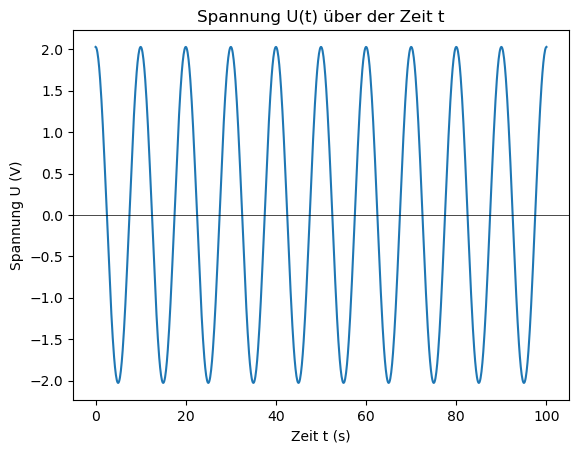

In [2]:
t = np.linspace(0, 100, 1000)  # Zeit t in Sekunden
U0 = 1.23 # Spannung U0 in Volt
f = 0.1 # Frequenz f in Hz
phi = 0.5 # Phasenverschiebung phi in Bogenmaß

# Berechnung der Spannung U(t)
#U =        U0 * np.cos(2 * np.pi * f * t + phi)  # reelle Schreibweise
U = np.real(U0 * np.exp(1j * 2 * np.pi * f * t + phi)) # komplexe Schreibweise, in Python 1j = sqrt(-1)


# Plotten der Spannung U(t) gegen die Zeit t
plt.plot(t, U)
plt.title('Spannung U(t) über der Zeit t')
plt.xlabel('Zeit t (s)')
plt.ylabel('Spannung U (V)')
plt.axhline(0, color='black', lw=0.5)
plt.show()

Um jetzt wirklich was Bewegliches zu haben, benutzen wir `interactive` aus `ipwidgets`. Wie das genau geht ist hier erst mal nicht so wichtig. Fragen Sie google oder eine KI.

In [ ]:
# with lots of help by AI copilot
from ipywidgets import interactive

# wir definieren eine Funktion, die die Animation erzeugt = plottet
# phi0 ist als Parameter der Phasenwinkel, den wir variieren wollen

# Funktionen sind in Python eingerückt
def animation(phi0):
    plt.subplot(1, 2, 1)  # zwei Plots nebeneinander

    # Draw a circle with radius 1
    phi = np.linspace(0, 2*np.pi, num=100)
    plt.plot(np.cos(phi), np.sin(phi), 'r-')

    # Draw a vector (line) from the origin at angle t
    plt.plot([0, np.cos(phi0)], [0, np.sin(phi0)], color='blue', lw=2)
    plt.scatter(np.cos(phi0), np.sin(phi0), color='blue', lw=2)

    # Draw real part of the vector
    plt.plot([0, np.cos(phi0)], [0, 0], color='blue', lw=2, linestyle='dashed')

    plt.gca().set_aspect('equal', adjustable='box') # set aspect ratio to 1:1 = square
    plt.axhline(0, color='black', lw=0.5)
    plt.axvline(0, color='black', lw=0.5)
    plt.xlabel('Spannung U (V)')


    # draw a second panel with the time evolution of the vector
    plt.subplot(1, 2, 2)
   
    phi = np.linspace(0, 10, 1000)  # alle Werte von phi
    plt.plot(phi, np.cos(phi), 'black')

    # draw a line from y=0 to the peak of the cosine function
    plt.plot([phi0, phi0], [0, np.cos(phi0)], color='blue', lw=2, linestyle='dashed')
    plt.scatter(phi0, np.cos(phi0), color='blue', lw=2)

    plt.gca().set_aspect(5)  # 10/2 = 5:1
    plt.gca().yaxis.tick_right()
    plt.gca().yaxis.set_label_position("right")

    plt.xlabel('Winkel  phi (rad)')
    plt.ylabel('Spannung U (V)')
    plt.axhline(0, color='black', lw=0.5)

# Ende der Einrückung bedeutet Ende der Funktion


# hier der eigentliche Code, der die Animation erzeugt
# phi0 zwischen 0 und 10, Schrittweite 0.01
# Die Funktion "animation" wird aufgerufen, wenn der Slider bewegt wird
interactive_plot = interactive(animation, phi0=(0, 10, 0.01))

# die letzte Variable wird angezeigt, also die Animation
interactive_plot

interactive(children=(FloatSlider(value=5.0, description='phi0', max=10.0, step=0.01), Output()), _dom_classes…

**Aufgabe** Spielen Sie mit dem Slider, um die Darstellungen zu verstehen

**Aufgabe** Kopieren Sie den Code in eine neue Zelle und verändern Sie ihn entsprechend Ihren Wünschen

## Wechselstromkreis mit Induktivität 

Eine Spule mit der Induktivität $L$ ist an einen Funktionsgenerator angeschlossen, der eine Spannung $U_g = U_0 \cos(2 \pi f t)$, mit der Frequenz $f$  (Kreisfrequenz  $\omega = 2 \pi f$) erzeugt. Die in der Spule induzierte Spannung $U_{ind} = -L dI / dt$ ist gleich groß und entgegengerichtet. Also
$$
 U_0 \cos (\omega t) =  L \frac{dI}{dt}
$$

Durch Auflösen nach $I$ und Integrieren bekommt man 
$$
I(t) = \frac{U_0}{\omega L} \sin(\omega t) = I_0 \sin(\omega t) 
$$

Strom und Spannung sind nicht mehr in Phase. Der Strom durch die Spule läuft der Spannung um 90 Grad nach.

## Wechselstromkreis mit Induktivität in komplexer Schreibweise

Wir wiederholen das Ganze noch einmal, diesmal jedoch in komplexer Schreibweise. Die Spannung des Funktionsgenerators schreiben wir als $U_g = U_0 e^{i \omega t} $. Dabei treffen wir die Vereinbarung, dass von komplexwertigen Strömen und Spannungen nur der Realteil physikalisch relevant ist. Diese Verabredung erspart uns das Schreiben von $U = \Re (...)$. Diese Angabe ist jedoch immer mitgemeint. Der Trick besteht darin, dass dies erst am Ende berücksichtigt werden muss und zwischendurch alles komplexwertig gerechnet werden kann.


Die Spannung am Generator sei also 
$$ U_g = U_0 e^{i \omega t}  = - U_{ind} = L \frac{dI}{dt} $$

Durch Integrieren bekommen wir 
$$ I = -i \, \frac{U_0}{\omega L } \, e^{i \omega t} $$
Das erfüllt die Zeile davor, wie man durch Ableiten testen kann.

Wir können das als **komplexen Widerstand** $Z$ schreiben, analog zum Widerstand $R$
$$ Z_L = \frac{U}{I} = \frac{U_0 e^{i \omega t} }{-i \, \frac{U_0}{\omega L } \, e^{i \omega t} } = i \omega L$$

Genau so findet man den komplexen Widerstand einer Kapazität zu 
$$ Z_C = -i \, \frac{1}{\omega C} = \frac{1}{i \omega C}$$ 
und natürlich ist der komplexe Widerstand eines Ohmschen Widerstand reelwertig, also
$$ Z_R = R $$

## RLC Reihenschaltung

Diese komplexen Widerstände sind praktisch, um Wechselspannungs-Schaltungen mit Kondensatoren und Widerständen zu verstehen. Wir betrachten  eine Reihenschaltung aus einem Kondensator C, einer Spule L und einem ohmschen Widerstand R, die von einem Funktionsgenerator angetrieben wird.

Die Spannung $U_g$ des Generators entspricht dem Strom durch den Schaltkreis mal dem komplexen gesamt-Widerstand
$$ U_g = U_0 \, e^{i \omega t} = Z_{RLC} \, I $$

Komplexe Widerstände verhalten sich in den Kirchhoff'schen Gesetzen wie Ohm'sche Widerstände. Hier addieren sich also alle drei
$$ Z_{RLC} = Z_R + Z_L + Z_C = R + i \omega L - i \, \frac{1}{\omega C} = R + i \left( \omega L - \frac{1}{\omega C} \right)$$

Das kann man in der komplexen Ebene mit Zeigern darstellen. Man trägt also $\Im (Z)$ über $\Re(Z)$ auf, bzw. interpretiert die komplexe Zahl $Z$ als Vektor. Der Betrag des komplexen Widerstand $|Z|$ wird Impedanz genannt. Diese ist in unserem Beispiel
$$
|Z| = \sqrt{ R^2 + \left( \omega L - \frac{1}{\omega C} \right)^2} $$
und die Phasenverschiebung $\phi$ zwoschen Strom und Spannung ist
$$ \tan \phi = \frac{\Im (Z)}{\Re (Z)} = \frac{ \omega L - \frac{1}{\omega C}}{R} $$

Mit all diesen Definition können wir also schreiben
$$ I(t) = \frac{U(t)}{Z_{RLC}} =  \frac{U_0 }{ R + i \left( \omega L - \frac{1}{\omega C} \right) } \, \, e^{i \omega t} =
\frac{U_0 }{ |Z| } \, \, e^{i \omega t - \phi}$$

**Aufgabe** Spielen Sie mit der folgenden Animation. Untersuchen Sie, wie die Parameter die Impedanz beeinflussen. 

**Aufgabe** Kopieren Sie die Animation in eine neue Zelle und passen Sie sie Ihren Wünschen entsprechend an.

In [ ]:
# Komplexer Widerstand als Vektor darstellen

def Z_RLC(R, L, C, f):

    Z_R = R
    Z_L = 1j * 2 * np.pi * f * L
    Z_C = 1 / (1j * 2 * np.pi * f * C)
    Z = Z_R + Z_L + Z_C

    # Draw  Z as vector
    plt.plot([0, np.real(Z_R)], [0, np.imag(Z_R)], color='blue', lw=2)
    plt.plot([0, np.real(Z_L)], [0, np.imag(Z_L)], color='blue', lw=2)
    plt.plot([0, np.real(Z_C)], [0, np.imag(Z_C)], color='blue', lw=2)

    plt.plot([0, np.real(Z)], [0, np.imag(Z)], color='red', lw=2)

    plt.gca().set_aspect('equal', adjustable='box') # set aspect ratio to 1:1 = square
    plt.axhline(0, color='black', lw=0.5)
    plt.axvline(0, color='black', lw=0.5)
    plt.xlabel('Realteil Z (Ohm)')
    plt.ylabel('Imaginärteil Z (Ohm)')
   
    plt.xlim(-5, 40)
    plt.ylim(-40, 40)

# Ende der Einrückung bedeutet Ende der Funktion

interactive_RLC = interactive(Z_RLC, R=(0, 40, 0.01), L=(0, 10, 0.01), C=(0.01, 1, 0.01), f=(0.01, 2, 0.01))

interactive_RLC

interactive(children=(FloatSlider(value=20.0, description='R', max=40.0, step=0.01), FloatSlider(value=5.0, de…